In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from math import sqrt

In [2]:
df=pd.read_csv(r'C:\Users\gjrre\Documents\EpochGeo\Data Science Exercise Data.csv')

# Data Exploration

In [3]:
df

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [5]:
# lowercase all column names for easier coding
df.columns = [x.lower() for x in df.columns]
df.describe()

,age,tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [6]:
#c checking for null values
df.isnull().sum().sort_values(ascending= False)

ship_name            0
cruise_line          0
age                  0
tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

In [7]:
df['cruise_line'].value_counts()

cruise_line
Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Oceania               3
Seabourn              3
Windstar              3
Cunard                3
Disney                2
Crystal               2
Azamara               2
Orient                1
Name: count, dtype: int64

In [8]:
def viz_df (dataframe, column, col_name):
    '''
    Returns two plots - a histogram and a box plot

    Parameters:
        dataframe: non-str 
        column: str 
        col_name: str
    '''
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.title(f'{col_name} distribution plot')
    sns.histplot(dataframe[column], kde=True)
    
    plt.subplot(1,2,2)
    plt.title(f'{col_name} size spread')
    sns.boxplot(y = dataframe[column])
    
    plt.show()

C:\Users\gjrre\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


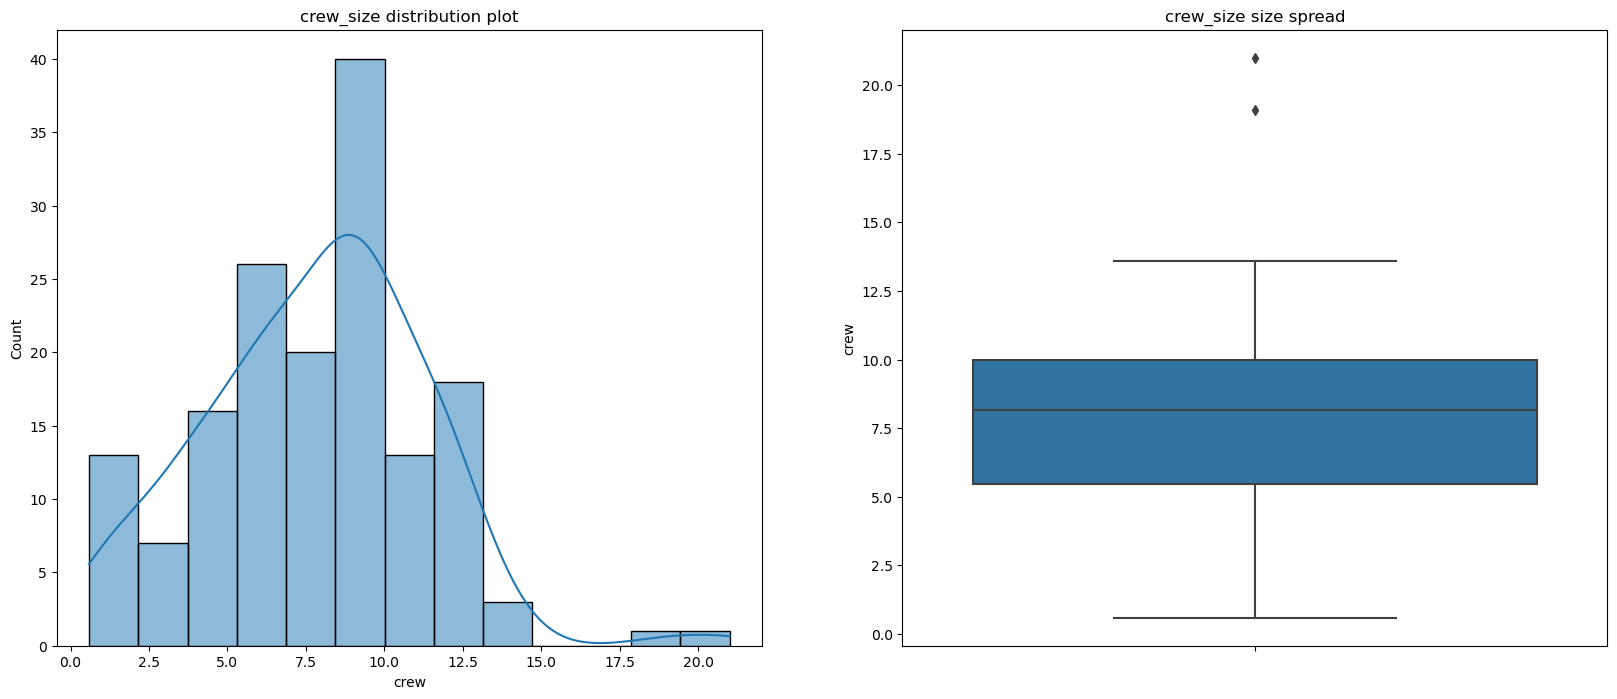

In [9]:
crew = viz_df(df, 'crew', col_name = 'crew_size')
crew

C:\Users\gjrre\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


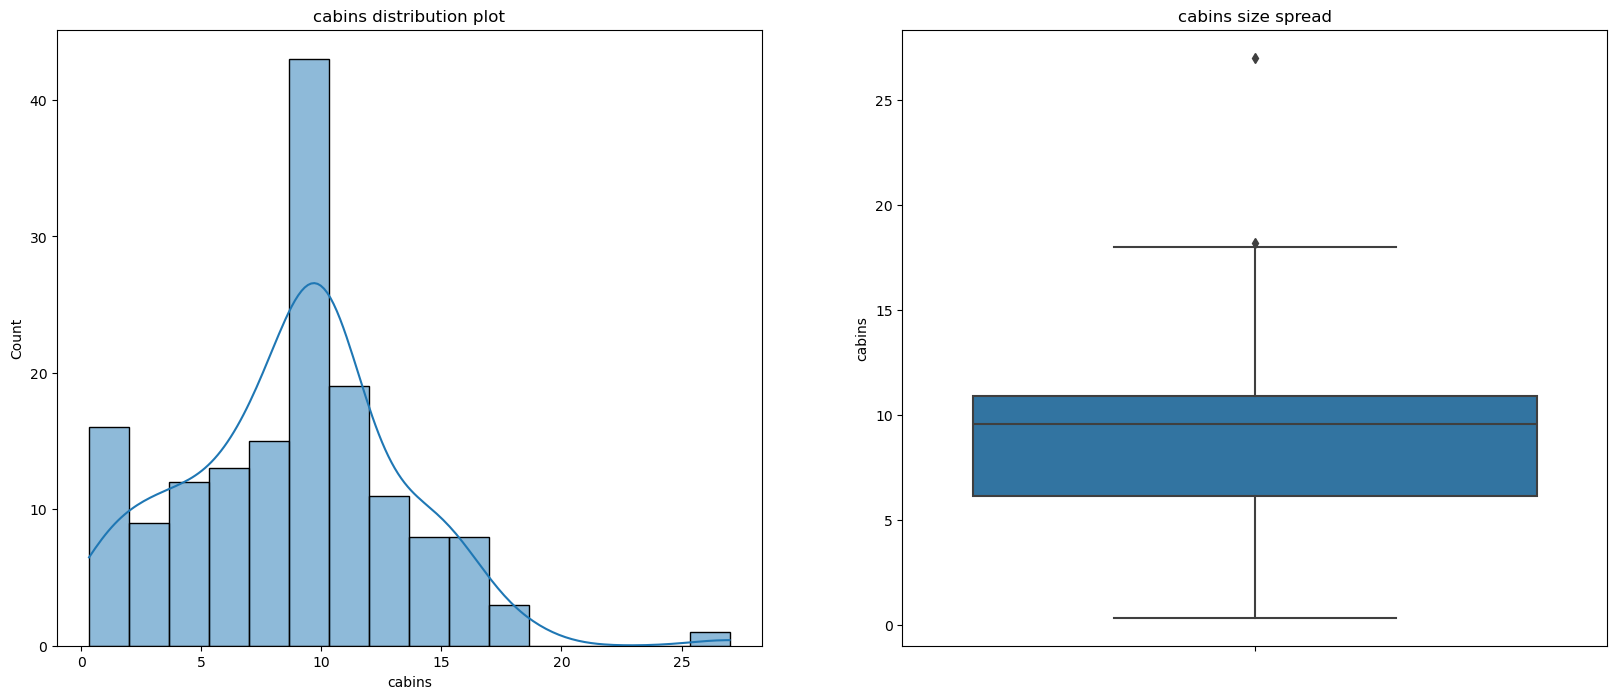

In [10]:
cabins = viz_df(df, 'cabins', col_name = 'cabins')
cabins

C:\Users\gjrre\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


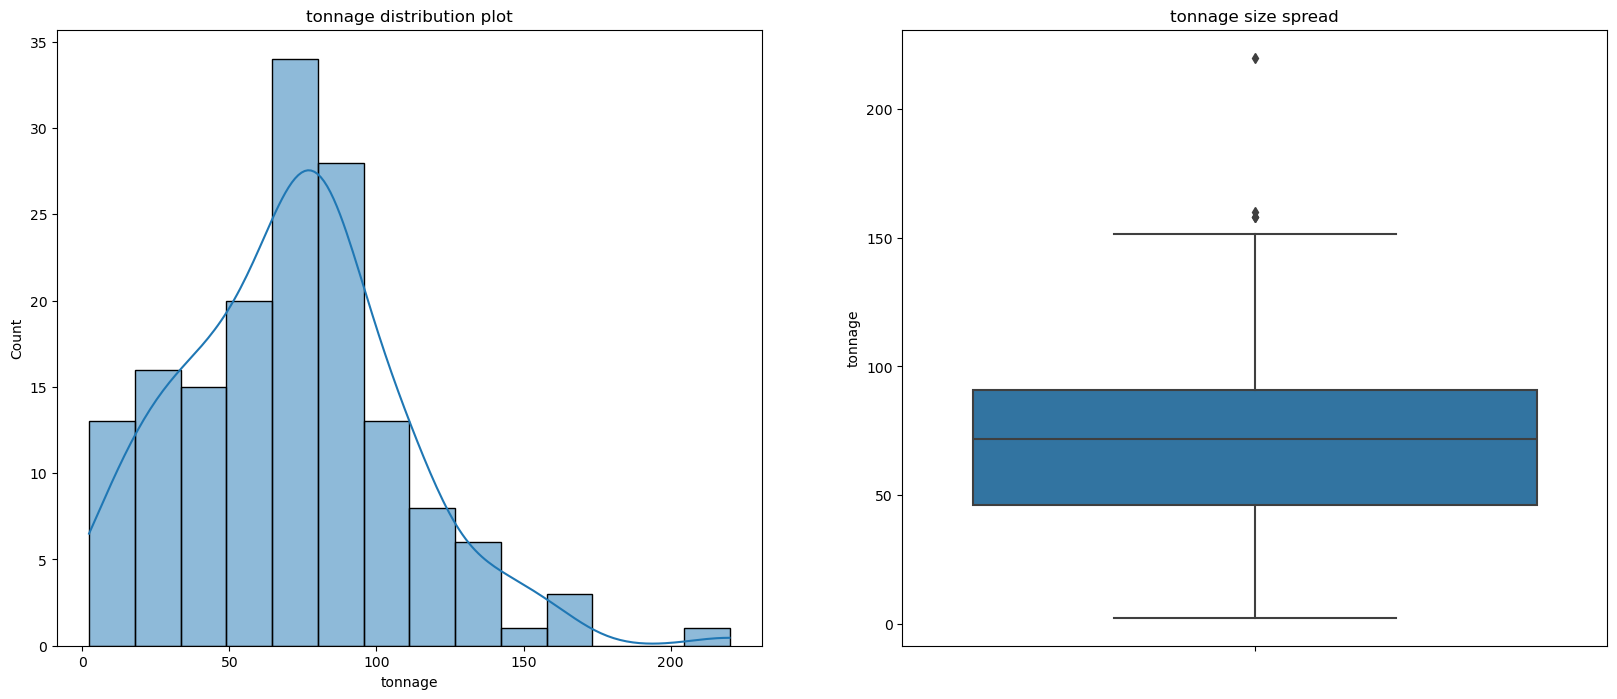

In [11]:
tonnage = viz_df(df, 'tonnage', col_name = 'tonnage')
tonnage

C:\Users\gjrre\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


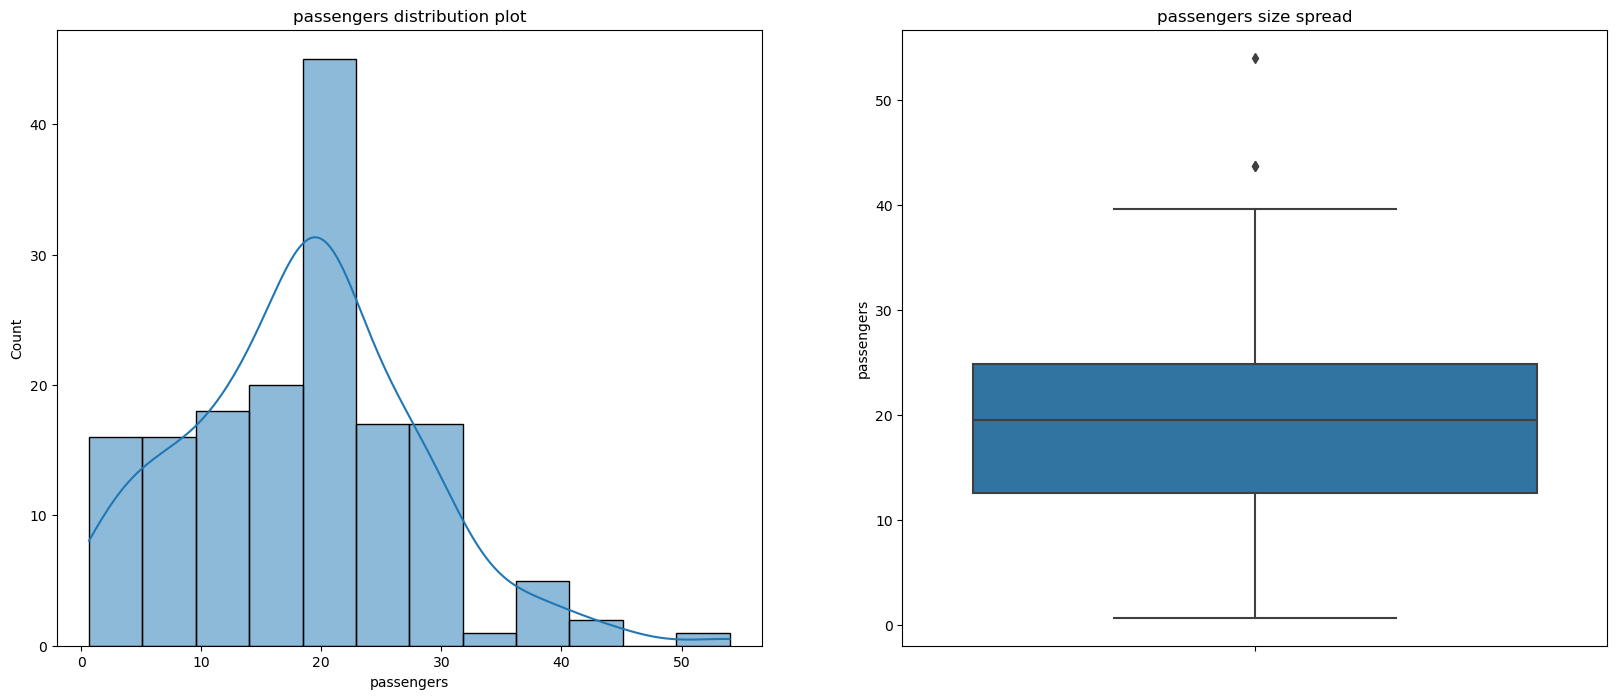

In [12]:
passengers = viz_df(df, 'passengers', col_name = 'passengers')
passengers

C:\Users\gjrre\anaconda3\envs\mlenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


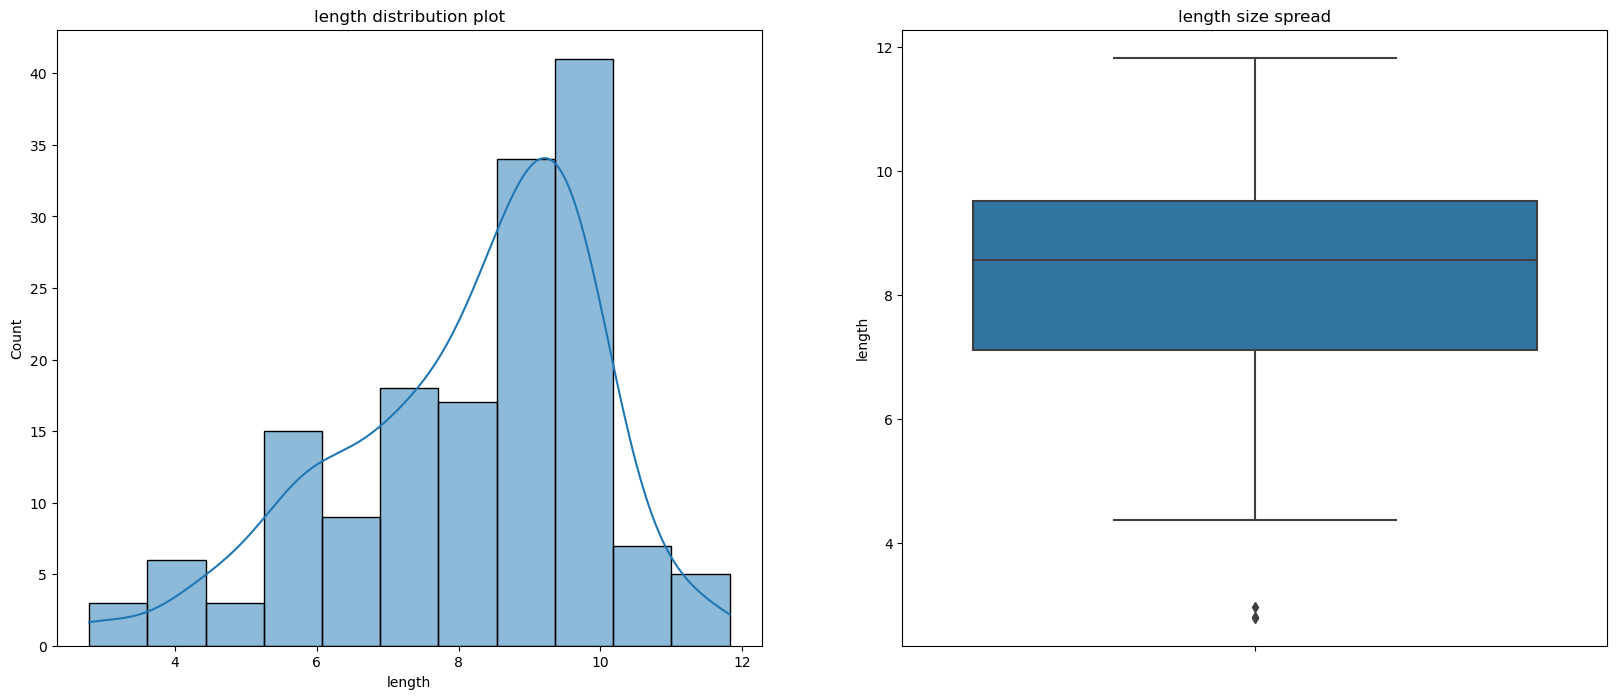

In [13]:
length = viz_df(df, 'length', col_name = 'length')
length

# Data Exploration Observations

### In terms of crew size, cabins, passengers and tonnage, the data is skewed to the left, indicating that the ships are relatively small in size. The length (presumably cabin size) tends to be fairly large. However, if the outliers are ignored, the histograms appear to be more bell-shaped, which reflects a normal distribution of the data.

### Other items to note: This is an extremely small dataset, of which will require continued updates to the model as more data is accumulated. Also, the data will have to be normalized to prevent one feature from disproportionately influencing the model, given the vast disparity in means across features. However, there are no null values in the dataset, which reduces any necessary cleaning steps.

# One-hot Encoding and Feature Importance

In [14]:
df.columns

Index(['ship_name', 'cruise_line', 'age', 'tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [15]:
df1 = df.drop('ship_name', axis=1)
df_enc = pd.get_dummies(df1, 'cruise_line', dtype = 'float', drop_first=True)

# df_enc = pd.get_dummies(df, columns = ['cruise_line', 'ship_name'], dtype = 'float', drop_first=True)
# df_enc

### After running the model, it was quite performant at 86%. However, ship name is not crucial to predicting crew size. So it is dropped from the dataframe for one-hot encoding. The results of removing this column are shown in the modeling section. It greatly increased the model's performance.

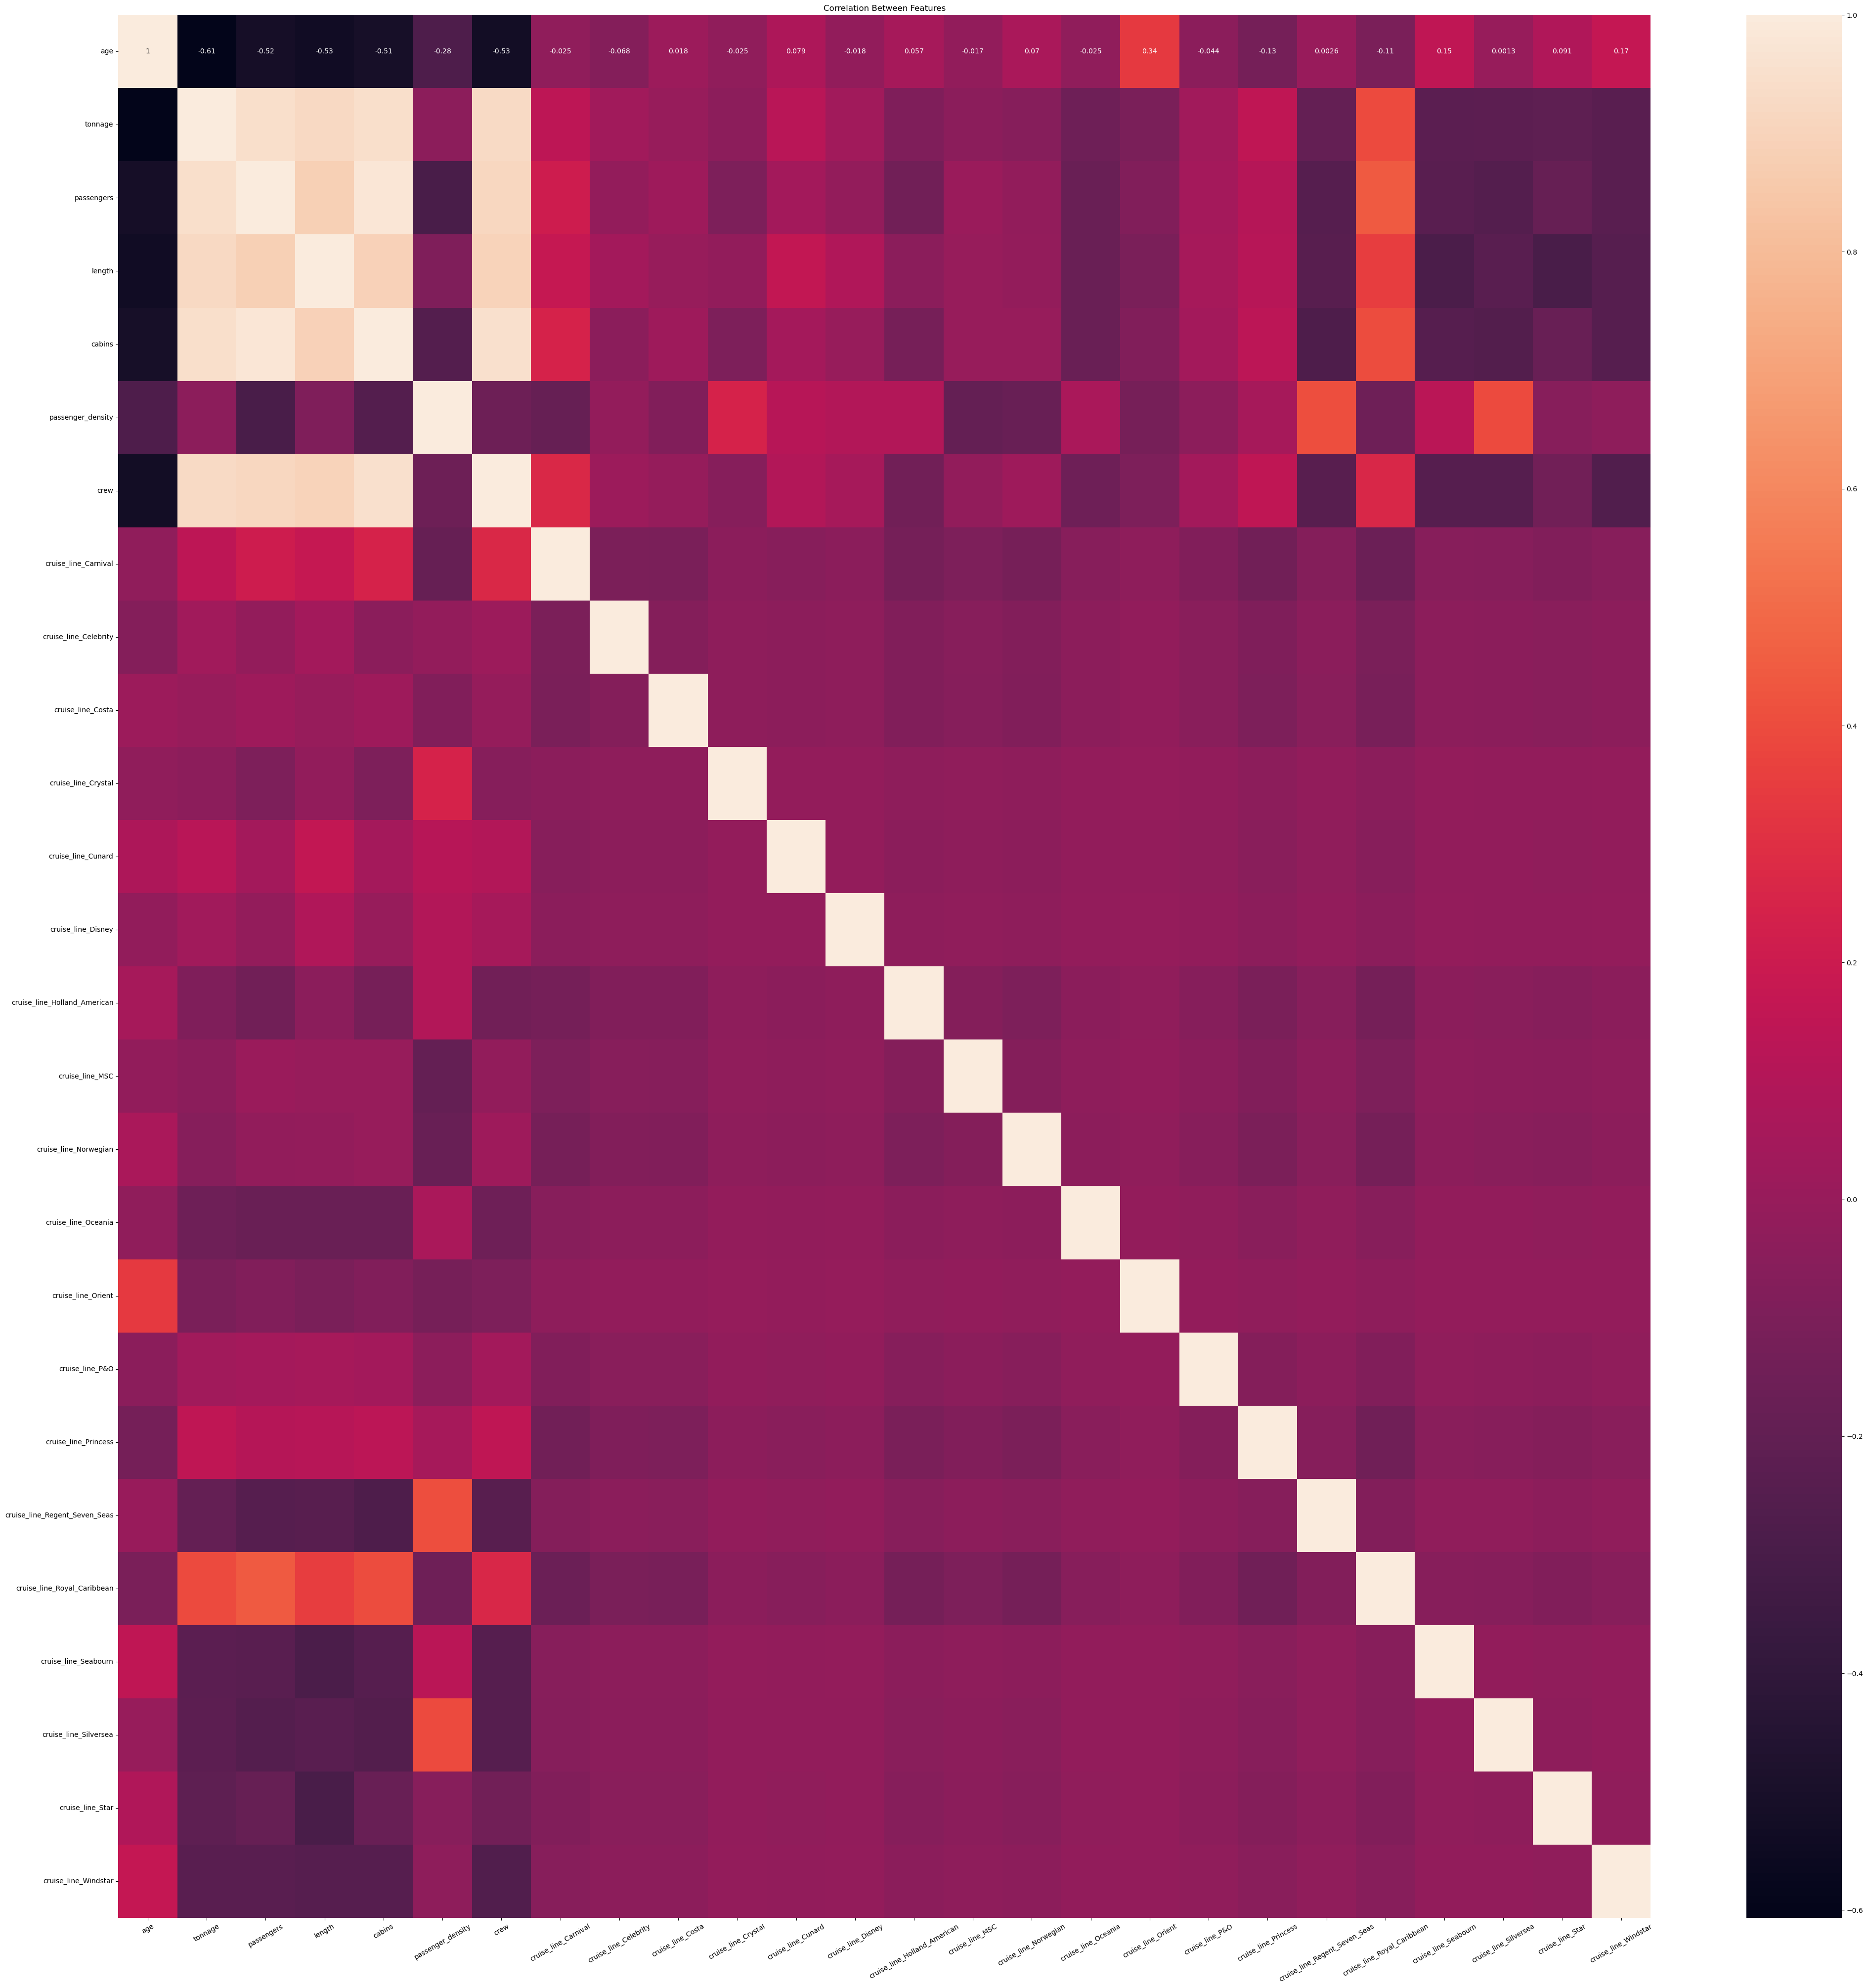

In [16]:
fig=plt.gcf()
fig.set_size_inches(50, 50)
plt.title('Correlation Between Features')
a = sns.heatmap(df_enc.corr(), annot=True)
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.show()

Text(0.5, 1.0, 'Features Correlating with crew')

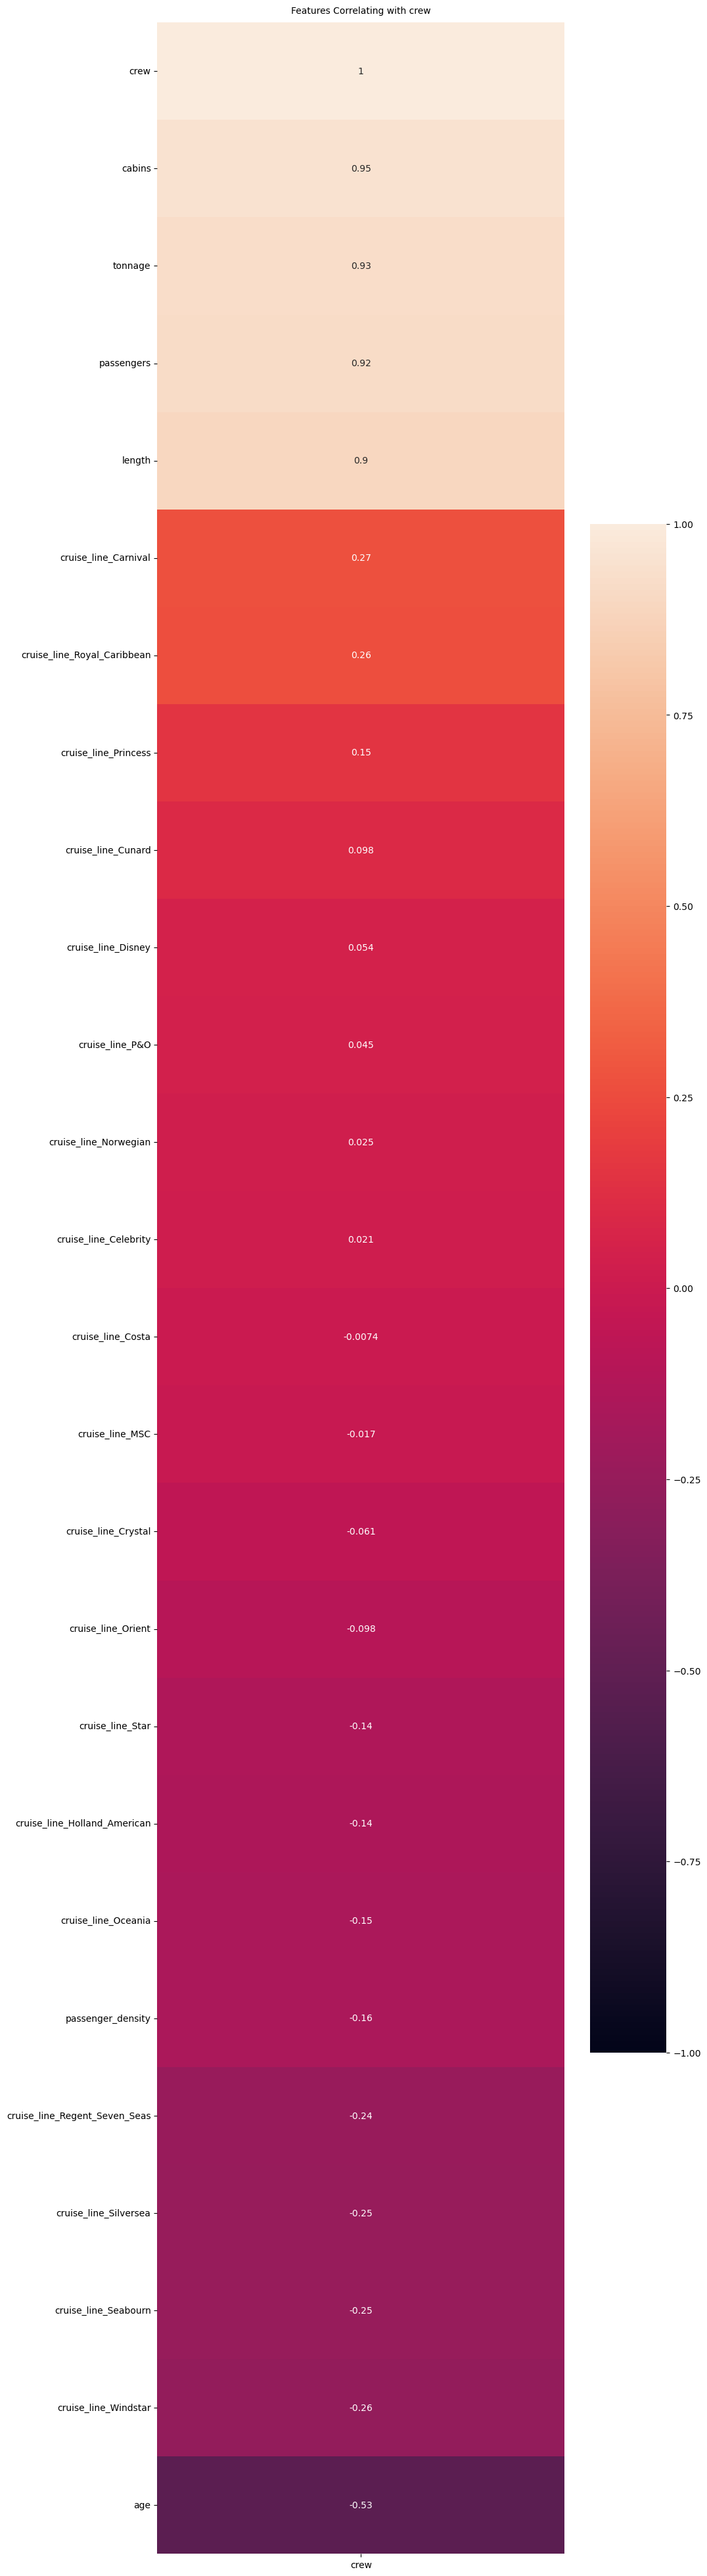

In [17]:
plt.figure (figsize = (10, 50), dpi = 100)
heatmap = sns.heatmap (df_enc.corr()[['crew']].sort_values (by = 'crew', ascending = False), vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Features Correlating with crew', fontdict = {'fontsize':10}, pad = 10)

# Feature Importance Focus

### The columns that are most important to predicitng crew size are cabins, tonnage, passengers and length based on correlation value. The least important are age and passenger density for the same reasoning. However, given that this is a statistical model, two additional tests will be applied to confirm this. 

### For training / testing, age and passenger density will be dropped to increase the model's acccuracy.

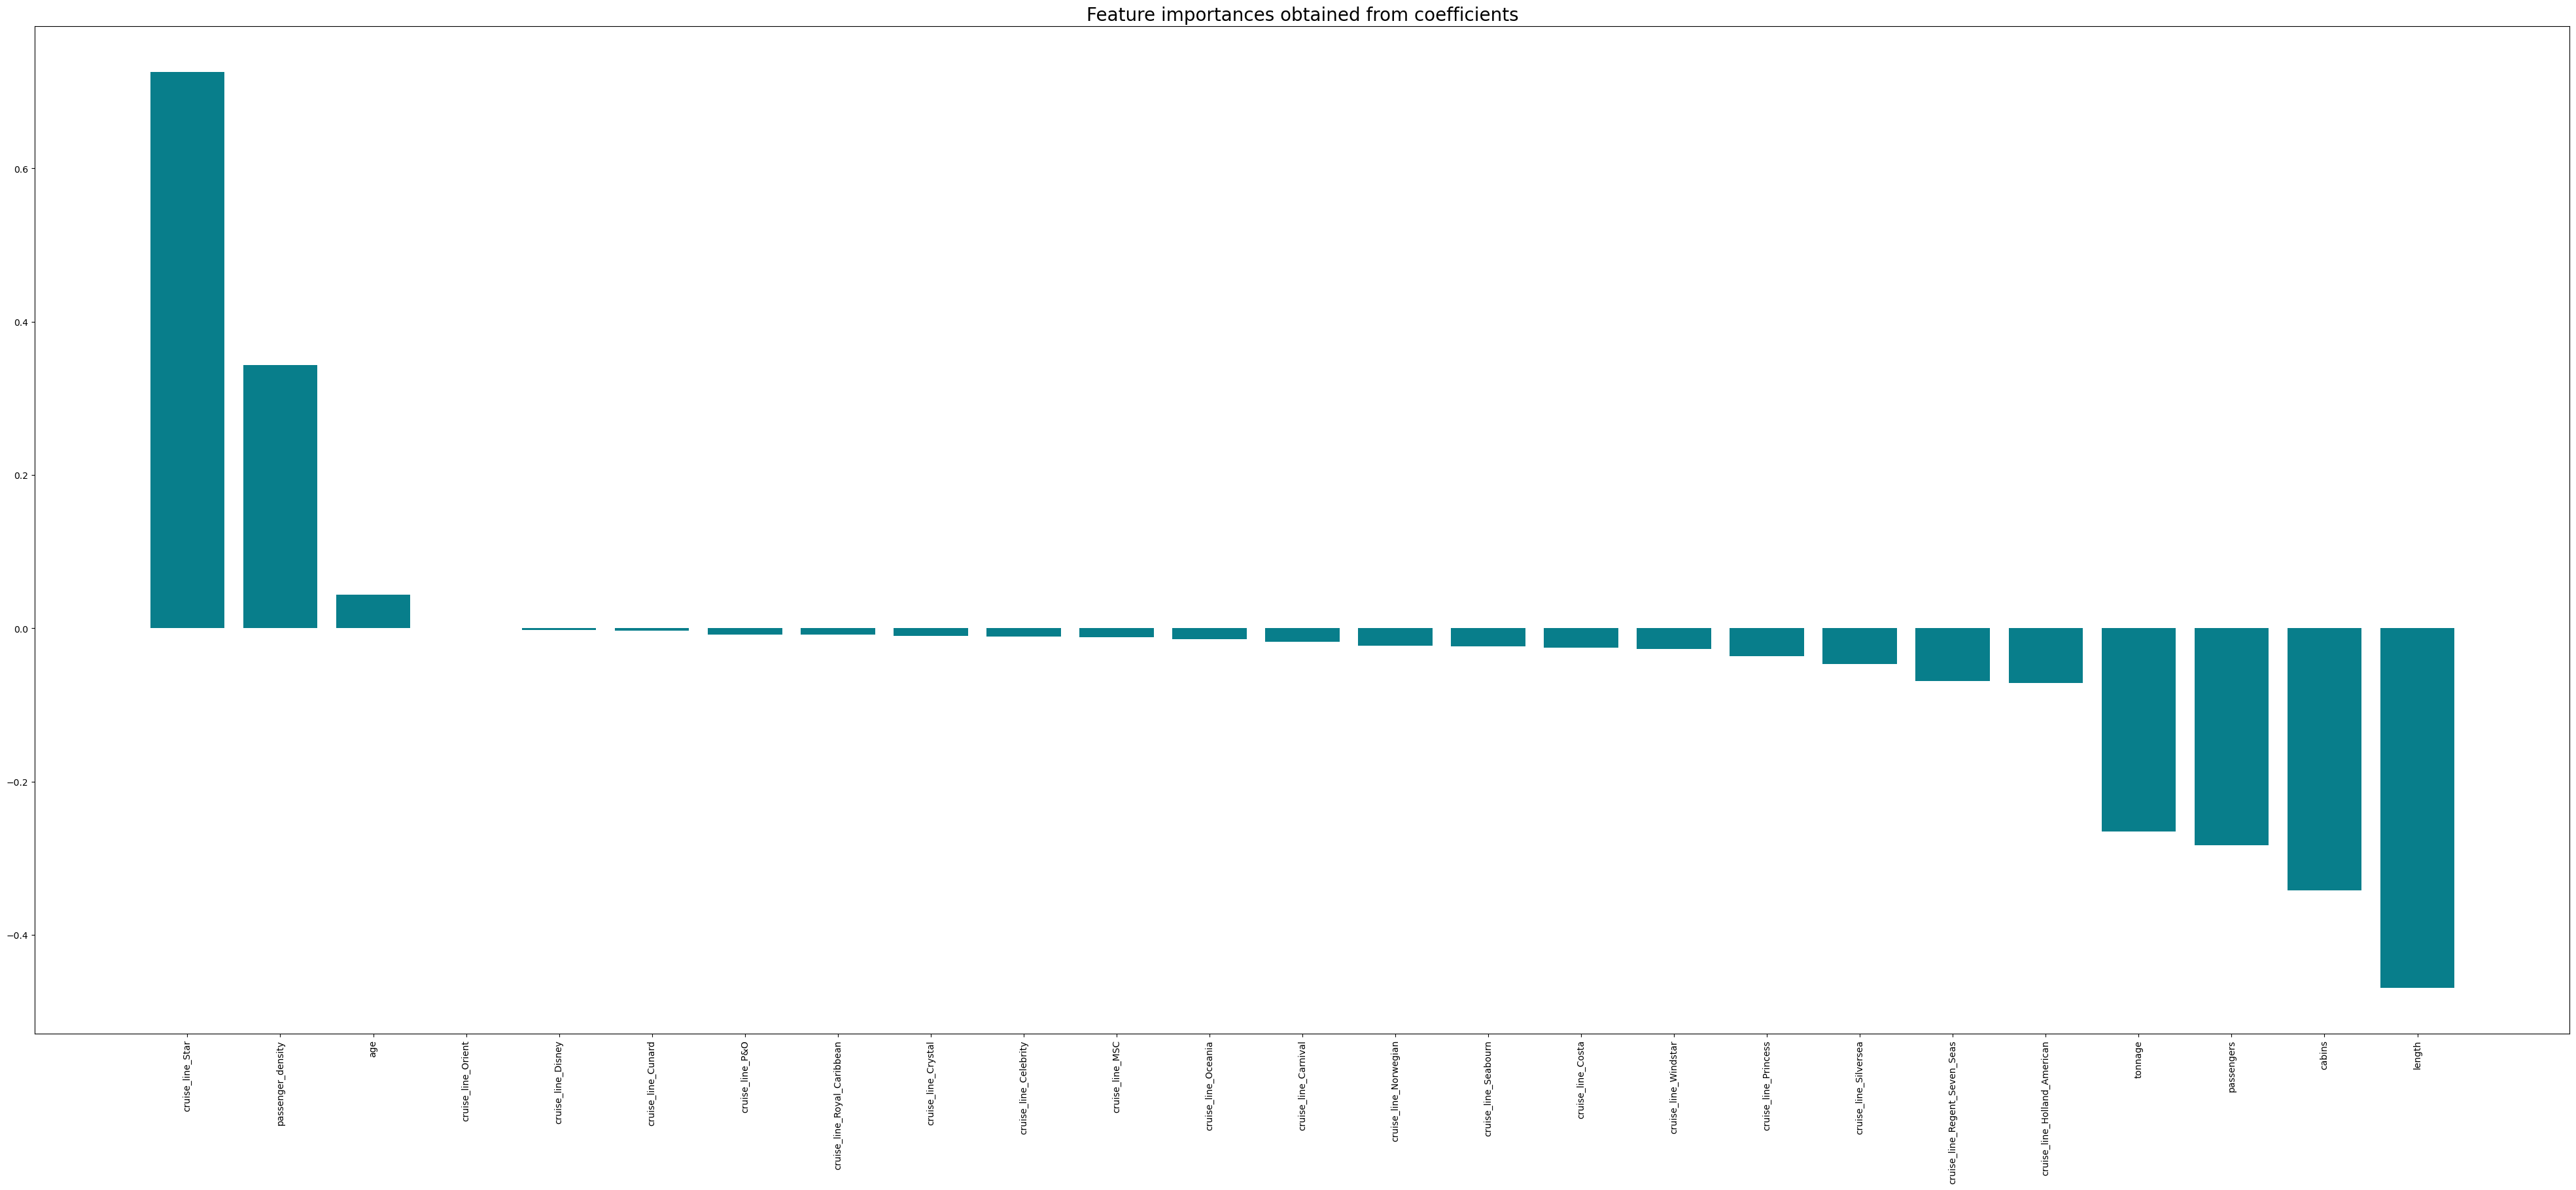

In [18]:
X = df_enc.drop('crew', axis=1)
y = df_enc['crew']

# have to encode the y otherwise returns "continuous" error
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.4, random_state=42)

# scaling data to normalize the dataset, thereby reducing influence of the outliers
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': lr_model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure (figsize = (50, 20), dpi = 100)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Text(0.5, 0, 'Feature Importance')

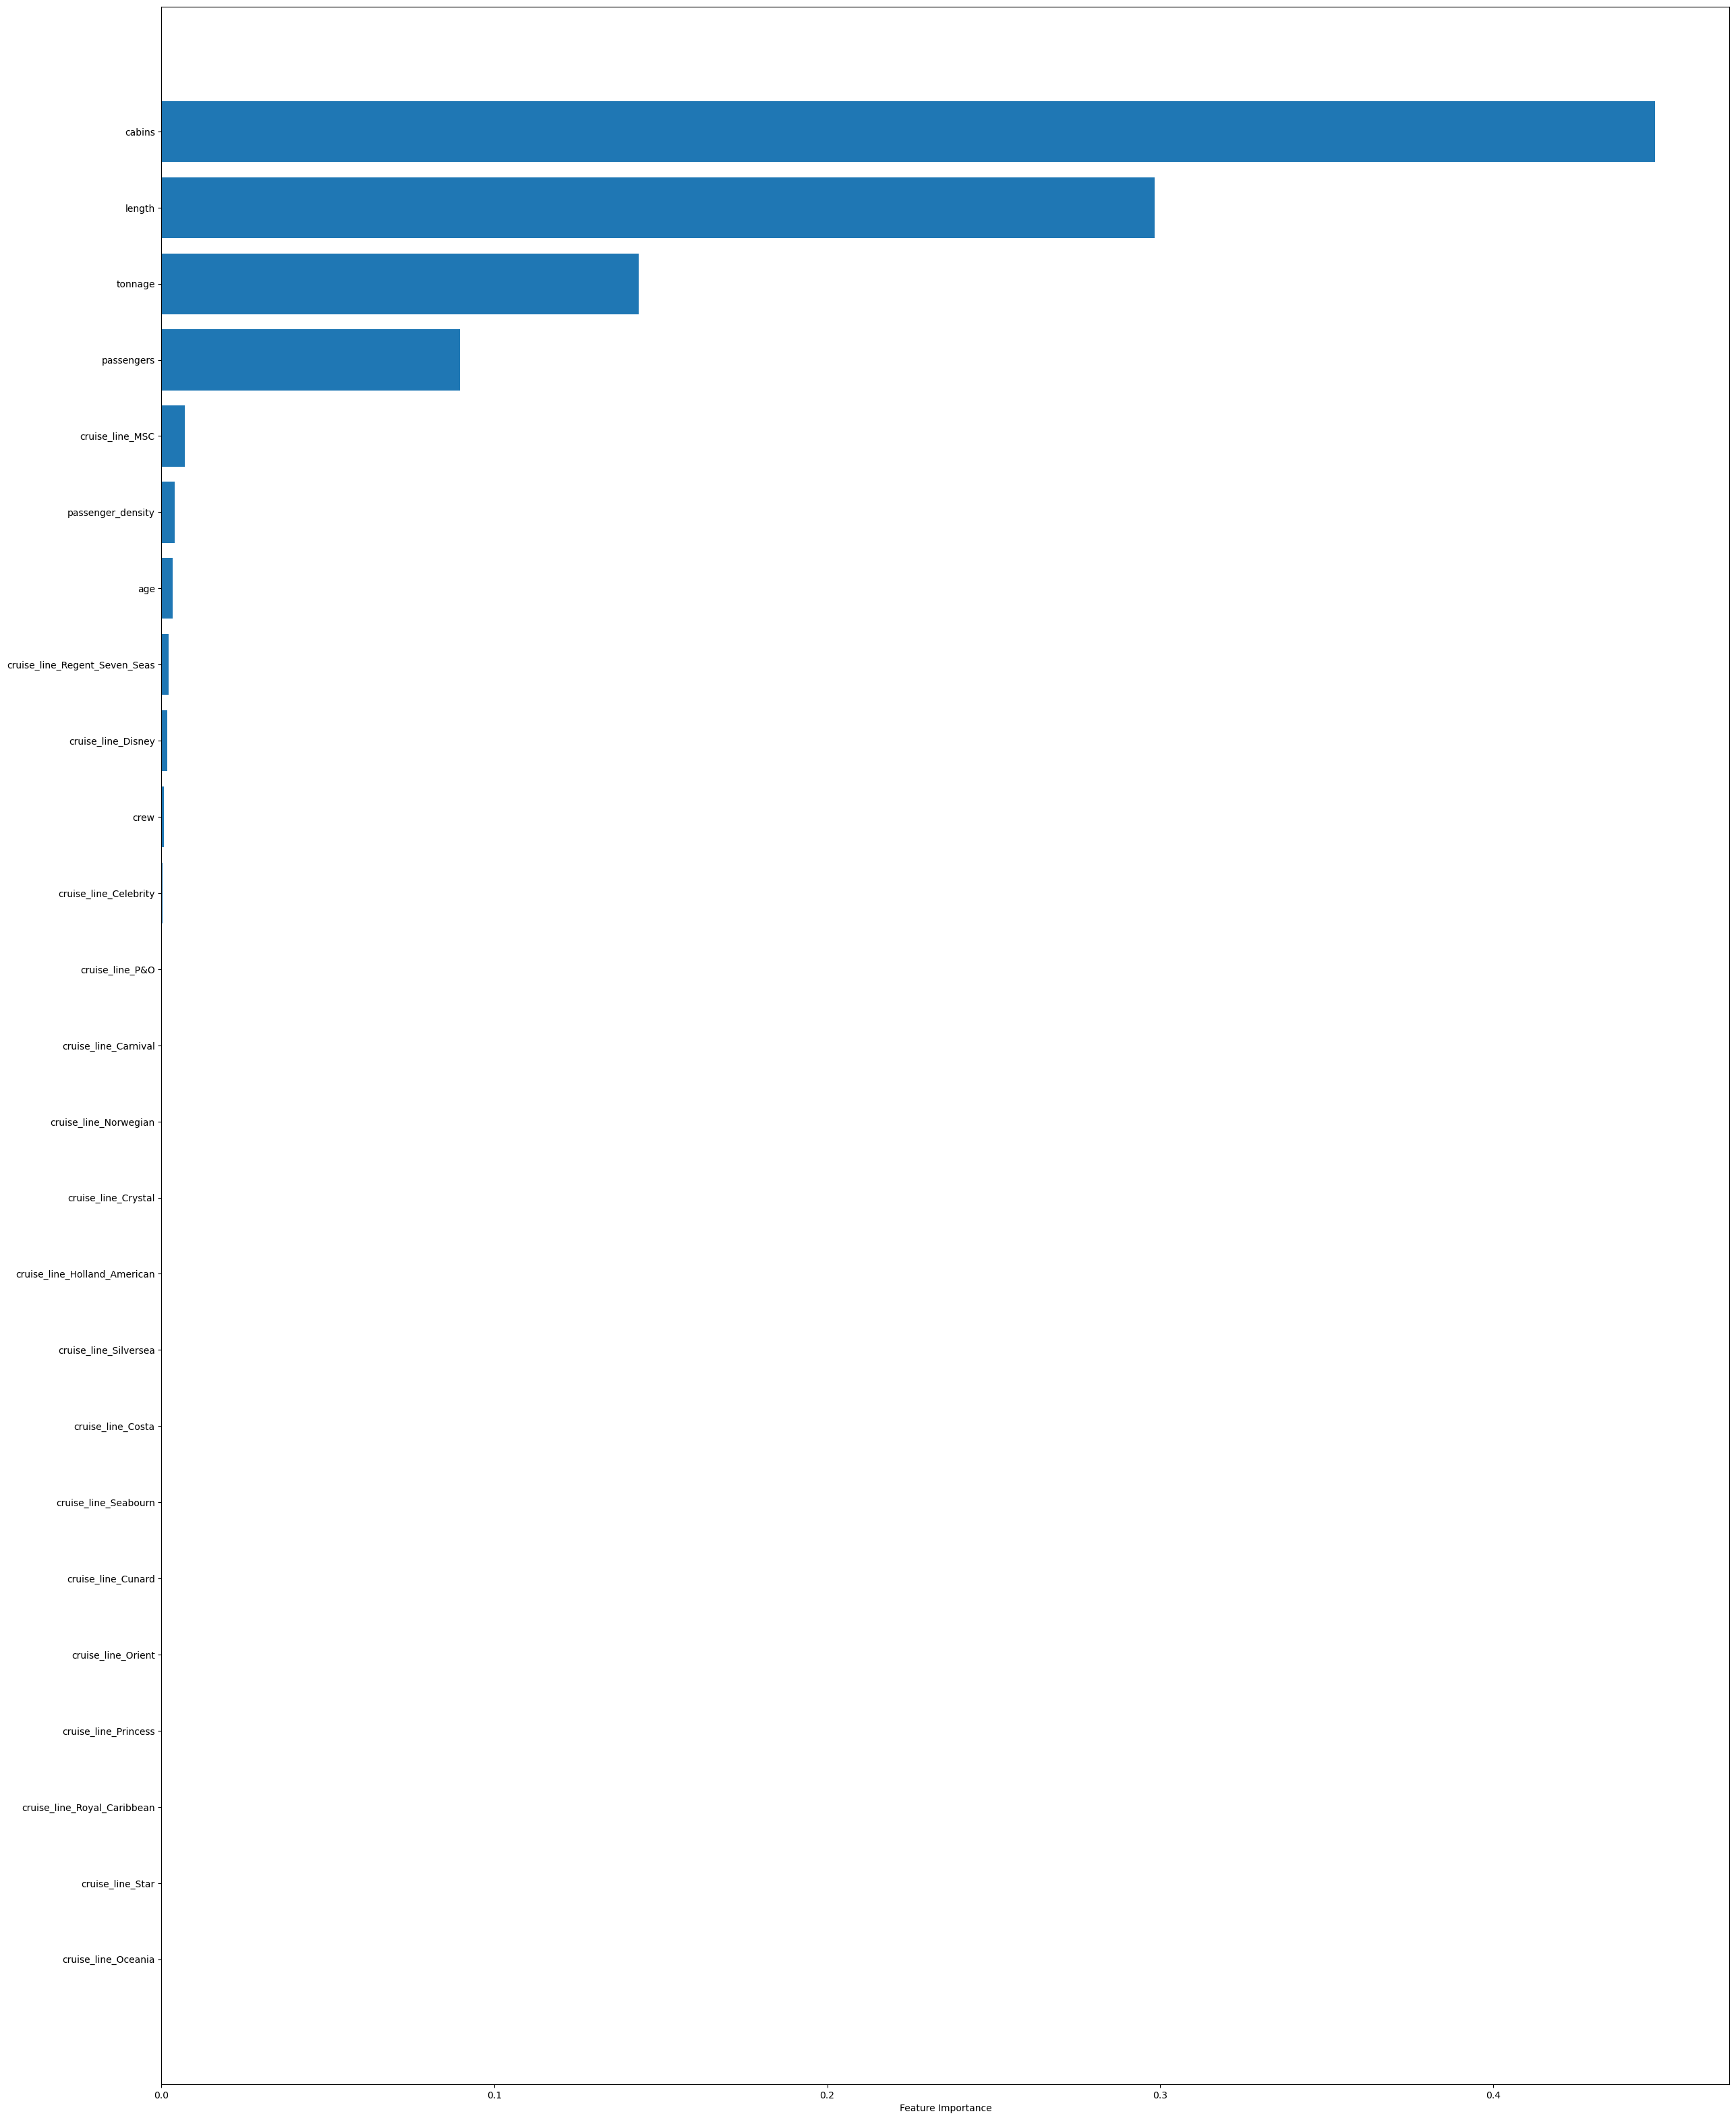

In [19]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train_scaled, y_train)

sort = rf_model.feature_importances_.argsort()

plt.figure (figsize = (30, 40), dpi = 100)
plt.barh(df_enc.columns[sort], rf_model.feature_importances_[sort])

plt.xlabel("Feature Importance")

# Training and Testing Models

In [ ]:
'''Random Forest Regressor'''


X = df_enc.drop(['crew', 'age', 'passenger_density'], axis=1)
y = df_enc['crew']

lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.4, random_state=42)

# scaling data to normalize the dataset, thereby reducing influence of larger numerica features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


## Define Grid 
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18, 42]
}

## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5,  verbose=5)
CV_rfr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END max_depth=3, max_features=sqrt, n_estimators=200, random_state=18;, score=0.920 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=sqrt, n_estimators=200, random_state=18;, score=0.877 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=sqrt, n_estimators=200, random_state=18;, score=0.911 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=sqrt, n_estimators=200, random_state=18;, score=0.861 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=sqrt, n_estimators=200, random_state=18;, score=0.945 total time=   0.2s
[CV 1/5] END max_depth=3, max_features=sqrt, n_estimators=200, random_state=42;, score=0.916 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=sqrt, n_estimators=200, random_state=42;, score=0.890 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=sqrt, n_estimators=200, random_state=42;, score=0.909 total time=   0.2s
[CV 4/5] END max_depth=3, max_features=sqr

### The hyperparameters used were max_depth - for how deep each decision tree should be, max_features - for square root or natural log, n_estimators - for the number of decision trees, and random_state - to see how the level of randomness affects the model's output accuracy

### I could attempt to add additional variables to each of the hyperparameters to determine the best parameters, it just would take a longer to computer and based upon the current variables, it probably won't have a significant factor on the model's accuracy.

### Random forests do not have a "regularization" paramter per say. In this instance, the max_depth parameter serves as the regularlization parameter as it can be adjusted to reduce / prevent overfitting.

In [ ]:
print("Best parameters: ", CV_rfr.best_params_)

In [ ]:
rfr = RandomForestRegressor(max_depth=CV_rfr.best_params_['max_depth'],
                    max_features=CV_rfr.best_params_['max_features'],
                    n_estimators=CV_rfr.best_params_['n_estimators'],
                    random_state=CV_rfr.best_params_['random_state'])
rfr.fit(X_train_scaled, y_train)

In [ ]:
# Predict on test data
y_pred = rfr.predict(X_test_scaled)

# Compute root mean squared error
rms = sqrt(mean_squared_error(y_test, y_pred))
rms

In [ ]:
r2 = r2_score(y_test, prediction)
r2

In [ ]:
# Create a residual plot
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest Regressor")
plt.show()